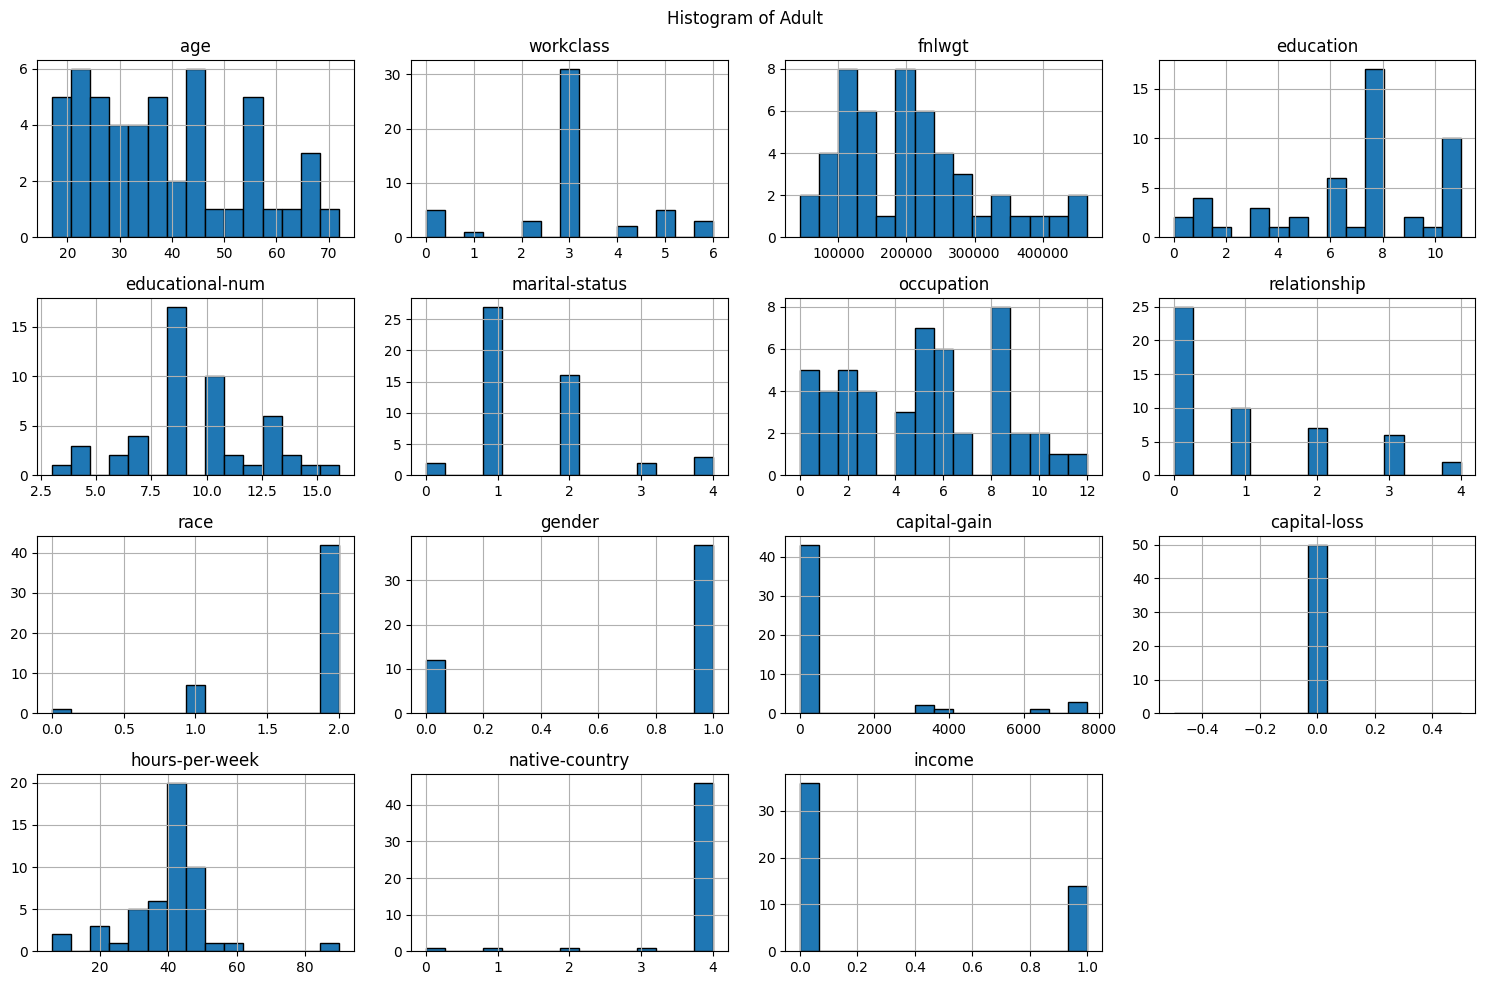

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv('/Users/shravaninomulwar/Downloads/DSBDALExam DataSets/DSBDALExam DataSets/adult_dataset.csv')
df=df.head(50)
# # Step 3: Convert all columns to numeric (force non-numeric '?' to NaN)
# df = df.apply(pd.to_numeric, errors='coerce')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        # Convert all values to string to avoid mixed types
        df[col] = le.fit_transform(df[col].astype(str))
        
# Step 4: Handle missing values
# Option 1: Drop rows with any missing values
df.dropna(inplace=True)

# Step 5: Plot histogram for all numerical columns
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogram of Adult")
plt.tight_layout()
plt.show()


In [100]:
import seaborn as sns


In [102]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

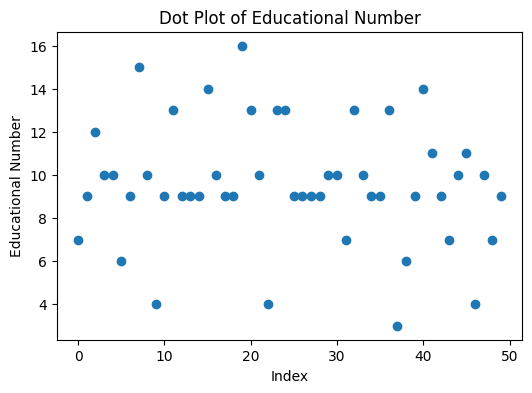

In [130]:
plt.figure(figsize=(6, 4))
plt.plot(df['educational-num'],'o')
plt.title('Dot Plot of Educational Number')
plt.xlabel('Index')
plt.ylabel('Educational Number')
# plt.grid(True)
plt.show()


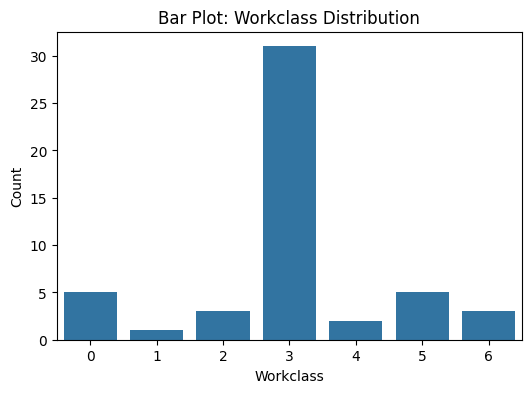

In [110]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='workclass')
plt.title('Bar Plot: Workclass Distribution')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()


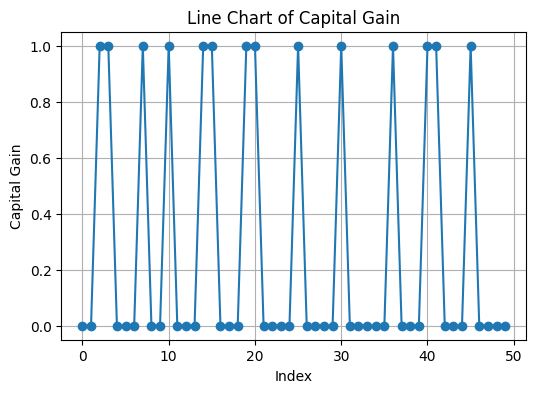

In [112]:
plt.figure(figsize=(6, 4))
plt.plot(df['income'], marker='o', linestyle='-')
plt.title('Line Chart of Capital Gain')
plt.xlabel('Index')
plt.ylabel('Capital Gain')
plt.grid(True)
plt.show()


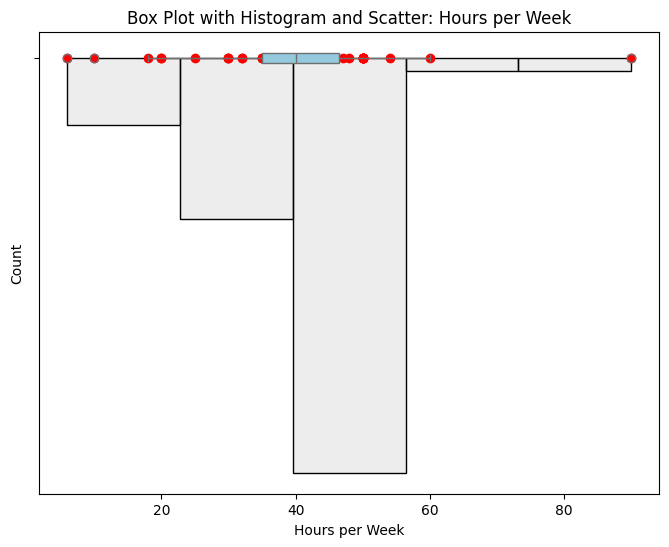

In [114]:
# Box Plot + Histogram + Scatter
plt.figure(figsize=(8, 6))

# Box plot
sns.boxplot(x=df['hours-per-week'], color='skyblue')

# Overlay histogram
sns.histplot(df['hours-per-week'], kde=False, bins=5, color='lightgray', alpha=0.4)

# Overlay scatter
for i, val in enumerate(df['hours-per-week']):
    plt.scatter(val, 0, color='red')

plt.title('Histogram and Scatter: Hours per Week')
plt.xlabel('Hours per Week')
plt.show()



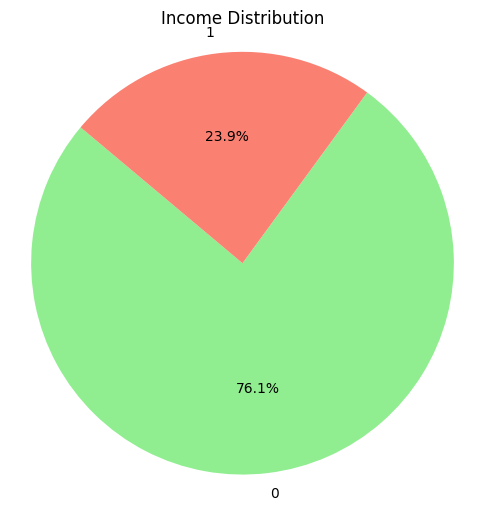

In [122]:
# Count values in the 'income' column
income_counts = df_clean['income'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
plt.title('Income Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

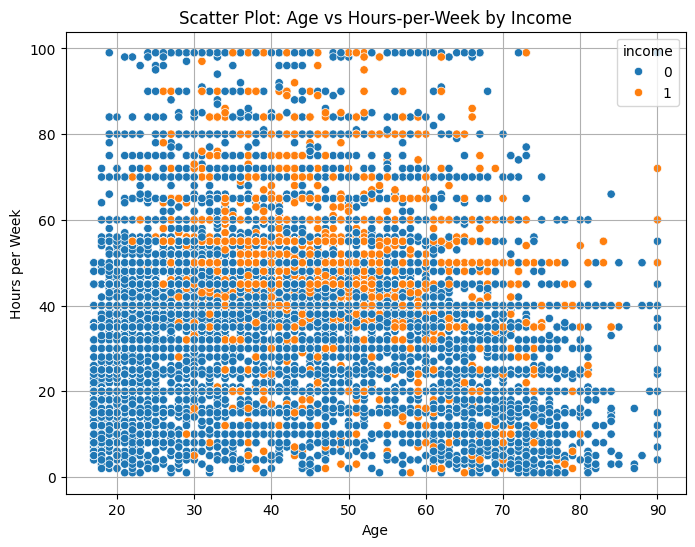

In [164]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='age', y='hours-per-week', hue='income')
plt.title('Scatter Plot: Age vs Hours-per-Week by Income')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
# plt.legend(title='Income')
plt.grid(True)
plt.show()

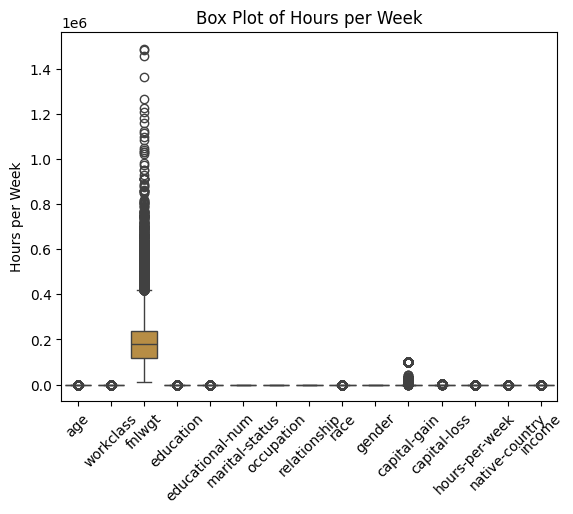

In [156]:
sns.boxplot(data=df_clean)
plt.title('Box Plot of Hours per Week')
plt.ylabel('Hours per Week')
plt.xticks(rotation=45)
plt.show()

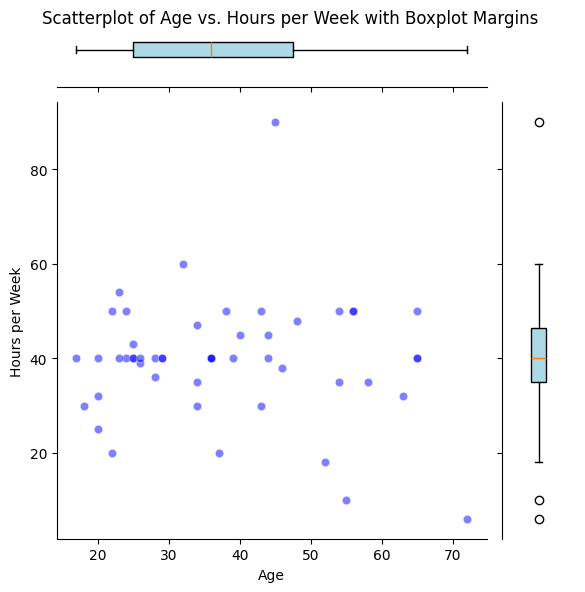

In [170]:
g = sns.JointGrid(data=df, x='age', y='hours-per-week', height=6)
g.plot_joint(sns.scatterplot, color='blue', alpha=0.5)
g.ax_marg_x.boxplot(df['age'], vert=False, widths=0.2, patch_artist=True, boxprops=dict(facecolor='lightblue', edgecolor='black'))
g.ax_marg_y.boxplot(df['hours-per-week'], vert=True, widths=0.2, patch_artist=True, boxprops=dict(facecolor='lightblue', edgecolor='black'))
g.ax_marg_x.set_yticks([])  # Hide y-ticks on top margin
g.ax_marg_y.set_xticks([])  # Hide x-ticks on right margin
g.set_axis_labels("Age", "Hours per Week")
plt.suptitle("Scatterplot of Age vs. Hours per Week with Boxplot Margins")  # Objective: Show the relationship between age and hours per week with marginal boxplots for their distributions
plt.show()
